In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
if not os.path.exists('../images'):
        os.makedirs('../images')

In [3]:
df=pd.read_csv("../data/Dry_Bean.csv")

In [4]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [6]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [7]:
df.shape

(13611, 17)

In [8]:
df['Class'].value_counts()

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

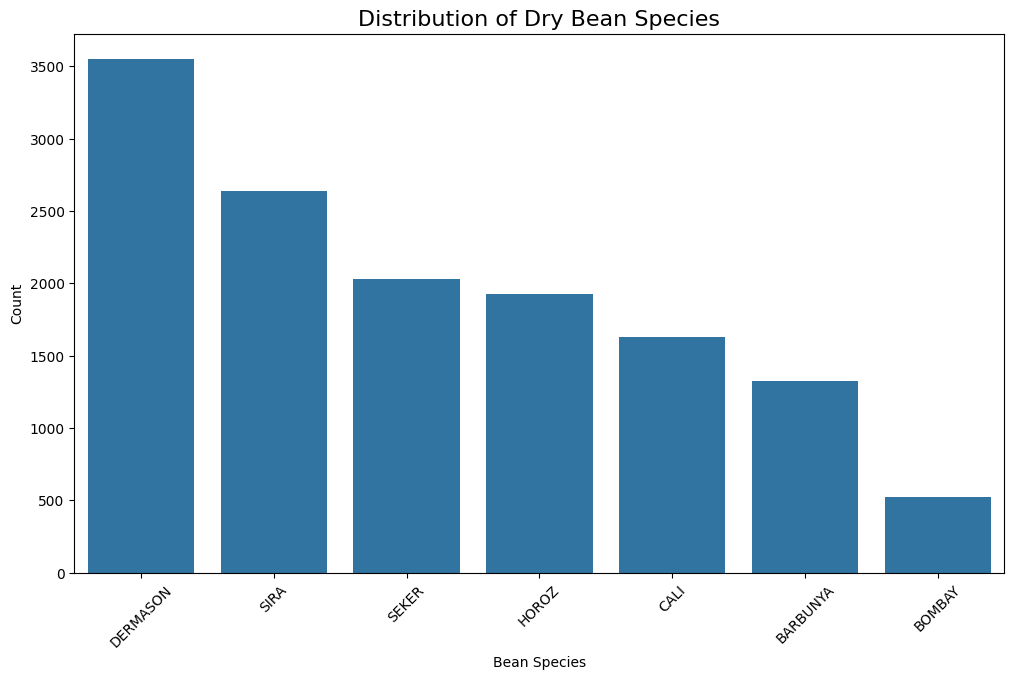

In [13]:
  # --- Check the Class Balance ---
  # # I need to see the distribution of the seven bean species.
plt.figure(figsize=(12, 7))
sns.countplot(x='Class', data=df, order = df['Class'].value_counts().index)
plt.title('Distribution of Dry Bean Species', fontsize=16)
plt.xlabel('Bean Species')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig('../images/01_bean_class_distribution.png')
plt.show()

This graph shows that the dataset is moderately imbalanced.

The number of examples for each bean species is not equal. The DERMASON class is the most common, while the BOMBAY class is the least common. This isn't an extreme imbalance, but it's significant enough that I'll need to use stratified splitting when I train my model to ensure each class is represented fairly in the training and testing sets.

In [11]:
df.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

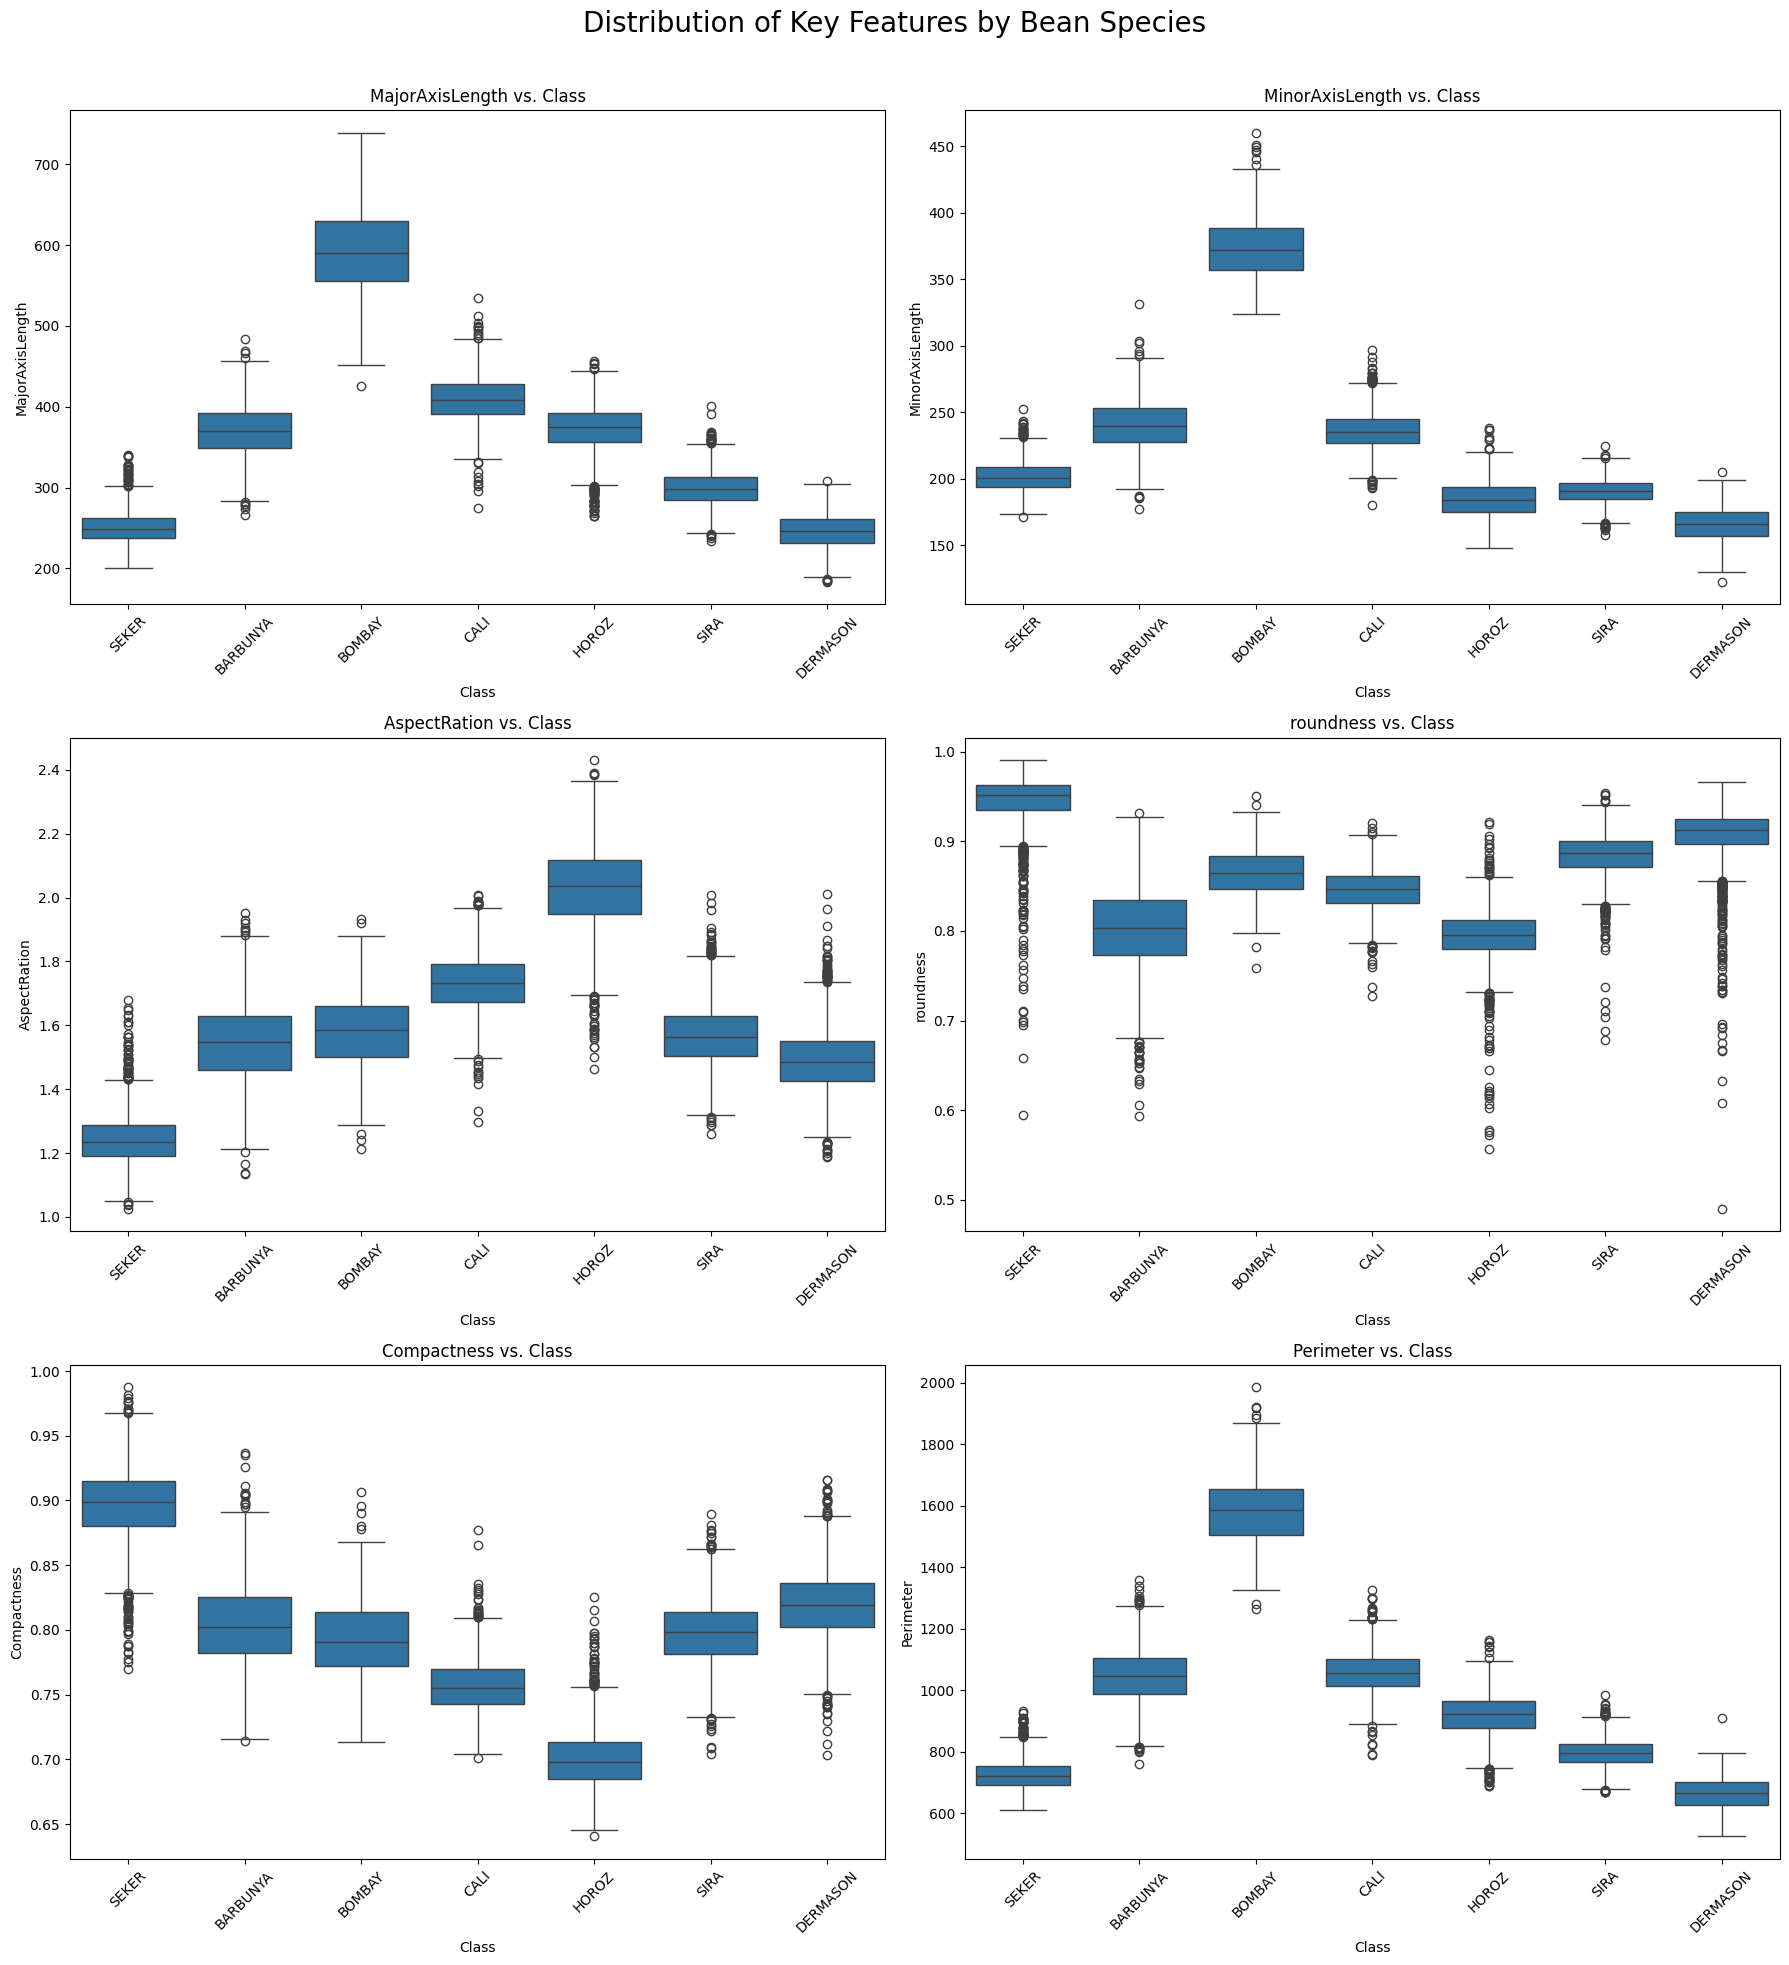

In [14]:
# --- Analyze Key Numerical Features vs. Class ---

# I'll select a few of the most promising shape-related features to visualize.
features_to_plot = ['MajorAxisLength', 'MinorAxisLength',
                    'AspectRation', 'roundness', 'Compactness', 'Perimeter']

# I'm creating a figure to hold multiple subplots for a clean layout.
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 20))
fig.suptitle('Distribution of Key Features by Bean Species', fontsize=20)

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, feature in enumerate(features_to_plot):
    sns.boxplot(x='Class', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'{feature} vs. Class')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig('../images/02_key_features_by_class.png')
plt.show()

Based on these plots, my analysis is that the physical measurements are excellent predictors for distinguishing between the bean species.

Each species has a relatively unique and consistent shape profile. For example:

The BOMBAY species is clearly the largest, with the highest values for MajorAxisLength, MinorAxisLength, and Perimeter.

The HOROZ species stands out with a much higher AspectRation, indicating it's more elongated than the others.

The SEKER species is consistently the smallest and has the highest roundness and Compactness, meaning it's the most spherical.

This clear separation between the classes gives me high confidence that a logistic regression model will be able to classify the different bean species with high accuracy.